In [14]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
import tensorflow as tf
hello = tf.constant("Hello, Tensorflow!")
# tensorflow constant, variables, placeholder
sess = tf.Session()
print(hello) # tensorflow의 데이터는 직접 확인이 불가
print(sess.run(hello)) # numpy 데이터로 변경

# Session: 실제로 값을 대입한 그래프가 동작하도록 해줌
# https://blog.naver.com/PostView.nhn?blogId=ndb796&logNo=221278249999&redirect=Dlog&widgetTypeCall=true&directAccess=false

Tensor("Const:0", shape=(), dtype=string)
b'Hello, Tensorflow!'


In [20]:
x = tf.constant(35, name = 'x')
# 모델의 그래프 구조 확인
# 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해서
y = tf.Variable(x + 5, name = 'y') # 변수가 있는 경우 반드시 초기화
print(y)

<tf.Variable 'y_6:0' shape=() dtype=int32_ref>


In [21]:
model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [10]:
# 판다스에서 데이터를 초기화 시킬땐 리스트나 딕셔너리에 담아서 초기화했다. # 요소끼리 연산 = 배열연산
a = tf.constant([1,2,3], name='a') # GPU 공간
b = tf.constant([4,5,6], name='b')
add_op = a+b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [11]:
# 자료구조: 그래프로 구성
a = tf.placeholder(tf.int16) # 데이터 없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)

In [13]:
with tf.Session() as sess: # with 안에서 끝나면 Session 메모리 삭제됨?
#     print("feed 변수합: %i" % sess.run(add, feed_dict={a:2, b:3})) # 데이터 주입 호출
#     print("feed 변수곱: %i" % sess.run(mul, feed_dict={a:2, b:3}))
    print("feed 변수곱: %i" % sess.run(total, feed_dict={a:2, b:3}))

feed 변수곱: 30


In [22]:
matrix1 = tf.constant([[3., 3.]]) # 1x2
matrix2 = tf.constant([[2.], [2.]]) # 2x1 => 1x1
product = tf.matmul(matrix1, matrix2) # matrix multiply

with tf.Session() as sess: # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


In [26]:
zeros = tf.zeros([2,2]) # 0,
ones = tf.ones([6]) #1

uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10) # 균등분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0) # 정규분포
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0) # 표준편차 2배 내의 것으로 초기화
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [34]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print("변수초기화", sess.run(random_var))

[[5.073092  4.1656046]
 [4.030782  4.0333514]]
변수초기화 [[1.2303077 1.1381614]
 [1.7087954 0.8803499]]


In [37]:
import tensorflow as tf
my_tensor = tf.constant(0, shape=[6,2]) # 6x2 행렬로 상수화하여 저장됨
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # class
print(my_static_shape) # 내용은 run으로 확인. 차수는 get_shape 함수로 확인

my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())
print(sess.run(my_tensor_transposed))

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [38]:
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval()) # run

[0. 0.]


In [40]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # chaining
    print(t.eval())
    sess.close()

In [42]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2, 3, 5])
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3])) # 여러개를 더할 수 있도록 '_n' 사용

[ 3.5 10.1]
[-8  5 17]


In [ ]:
# 2x + y + z = 1
# 4x + 3y + 4z = 2
# -4x + 2y + 2z = -6
# A dot x = [1,2,-6] # 행렬 나누기 => 역행렬
    y
    z
# 3x3 3x1 => 3x1 == [1,2,-6]

In [44]:
sess = tf.Session()
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape=[3,3])
print(sess.run(x))
y = tf.constant([1.0, 2, -6], shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [45]:
z = tf.matrix_solve(x,y) # x의 역행렬을 구해 y를 곱해주는 함수
result = sess.run(z)
print("계수:", result)
print(sess.run(z))
# 해가 출력됨. 1, -2, 1

계수: [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [47]:
print(2.0 * result[0] + 1.0 * result[1] + 1.0 * result[2])
print(sess.run(tf.matmul(x,z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [49]:
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y) # 이 두 단계가 matrix_solve와 같음
print("해:", sess.run(z))

해: [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [51]:
# 특이행렬분해(singular value decomposition) : 행열이 다를 때
# PCA 할 때 - 고유값분해 eigenvalue + eigenvector : 정방행렬
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑는다
s, u, v = tf.svd(a) # singular value, u(2x2), s(1x2), v(3x2)
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))

[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [52]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 - one hot encoding 할 때 많이 씀
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [53]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia))) # 대각 요소의 값을 더해줌

[1 2 3 4]
10


In [55]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a,b)
sess.run(c) # 2x2

array([[ 58,  64],
       [139, 154]])

In [66]:
# 행열: 행과 열을 확인하고 앞의 것은 개수 어떻게 층을 이루가 있는가
a = tf.constant(np.arange(1,13, dtype=np.int32), shape=[2,2,3]) # 행열을 중심으로 하여 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(13,25, dtype=np.int32), shape=[2,3,2]) # shape에서 뒤의 두가지(행과 열)만 판단
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c) # 2x2x2
# 2x2가 4개

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [65]:
# a를 제곱해보자 (자기 자신을 제곱하려면 전치해야함)
a = tf.constant(np.arange(1,25, dtype=np.int32), shape=[2,2,2,3]) # 행열을 중심으로 하여 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(25,49, dtype=np.int32), shape=[2,2,3,2]) # shape에서 뒤의 두가지(행과 열)만 판단
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)
# 2x2가 4개

d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a, a, transpose_b=True) # 전치해서 자기 제곱. 바로 위와 같은 코드

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]
[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_15:0' shape=(2, 2, 2, 2) dtype=int32>

In [69]:
                            # 0 1 2
x = tf.constant([[[1,2,3], # 2x2x3 => 제곱이 되려면 2x3x2(0,2,1)
                 [4,5,6]],
                [[7,8,9],
                [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3x2x2 : # 디폴트 2 1 0

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [71]:
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [72]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [73]:
t = [1,2,3,4,5,6] # 1개 행, 6개의 데이터를 6차원으로 나누기
t = tf.reshape(t, [1,2,1,3,1,1]) # 2x3=6 -> 
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [74]:
print("t의 차원은", sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [75]:
print("차원의 수를 축소할 때", sess.run(tf.shape(tf.squeeze(t))))

차원의 수를 축소할 때 [2 3]


In [86]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor,[2,-1]))) # -가 들어가면 계산해서 알아서 채워라
print("-------------------")
print(sess.run(tf.reshape(tensor, [-1, 6])))
print("-------------------")
print(sess.run(tf.reshape(tensor, [2, -1, 3])))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
-------------------
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
-------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [84]:
print(tf.expand_dims(t,0)) # 차원 확대

Tensor("ExpandDims_1:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [91]:
# paddings 충전재
t = [[1,2,3],[4,5,6]] # 2x3 => 4x7
paddings = [[1,1],[2,2]] # 행을 위에 하나 밑에 하나 추가 + 열을 왼쪽에 2개 오른쪽에 2개 추가
print(sess.run(tf.pad(t, paddings, "CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [92]:
# 수를 반사해서 채움
paddings = [[1,1,], [1,1]] # 4x5
print(sess.run(tf.pad(t,paddings,"REFLECT")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [96]:
# 거울에 비친 듯 수를 채움
paddings = [[2,2,], [3,3]]
print(sess.run(tf.pad(t, paddings, "SYMMETRIC")))

[[6 5 4 4 5 6 6 5 4]
 [3 2 1 1 2 3 3 2 1]
 [3 2 1 1 2 3 3 2 1]
 [6 5 4 4 5 6 6 5 4]
 [6 5 4 4 5 6 6 5 4]
 [3 2 1 1 2 3 3 2 1]]


# 다차 방정식의 해를 구하는 방법들
- 무작위 대입법
- 역행렬 이용
- 입출력 데이터만: 계수 결정(가중치 학습을 통해서 학습)

In [104]:
# 데이터로부터 규칙을 발견 -> 분류와 예측을 하기 위해서
import numpy as np
import tensorflow as tf
# 데이터 생성 => mini batch
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 # 선형방정식으로 만듬
print(x_data)
print(y_data)
len(y_data)

[0.90160424 0.5707929  0.8607433  0.09412738 0.77912205 0.6895539
 0.16438058 0.58987063 0.6694536  0.8989239  0.44048008 0.8927129
 0.8545097  0.49542663 0.5529682  0.35968837 0.39535007 0.5769601
 0.07599767 0.14843096 0.9436165  0.39564493 0.44753236 0.99959195
 0.4102881  0.12286382 0.8678134  0.14908755 0.38730657 0.53173435
 0.82774866 0.60519916 0.2947212  0.4199242  0.29629683 0.18754563
 0.68207544 0.4857058  0.56368184 0.49938986 0.37910157 0.30652782
 0.21850193 0.5475331  0.9522866  0.9895085  0.20929228 0.67320603
 0.79826814 0.83640087 0.14148708 0.7486199  0.5407044  0.82187986
 0.04729633 0.2752235  0.37572375 0.3033077  0.06388444 0.30362716
 0.57155305 0.42360184 0.8564566  0.28528732 0.7813326  0.74949443
 0.79007804 0.5611649  0.13100982 0.59372693 0.89638865 0.49929866
 0.7918437  0.38076407 0.7785356  0.45087713 0.99390286 0.74221396
 0.29099062 0.45858392 0.8320528  0.62181824 0.02915575 0.6744896
 0.7603911  0.80775136 0.13794011 0.30996042 0.07903533 0.09741468

100

In [106]:
# 가중치(설명력)와 bias
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포 # variable에는 가중치가 들어감
b = tf.Variable(tf.zeros([1])) # bias: activation을 결정(활성화1 비활성화0)
# 가중치에는 꼭 bias가 한 개씩 결합
sess = tf.Session()
y = W * x_data + b # 예측

In [107]:
# loss function : MSE: 2차원인 경우 포물선을 이루고 최적점은 한 개
loss = tf.reduce_mean(tf.square(y - y_data))
# 경사하강법 - 기울기(미분을 이용해서 기울기가 -면 가중치에 차를 더해주고 +이면 가중치에 감하는 연산)
optimizer = tf.train.GradientDescentOptimizer(0.5) # 학습율
train = optimizer.minimize(loss)

In [108]:
init= tf.global_variables_initializer() # 세션을 실행하기 전
sess.run(init)

In [109]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b)) # 0.1 + 0.3

0 [-0.24626201] [0.695487]
20 [-0.03748895] [0.37558317]
40 [0.05632957] [0.3240074]
60 [0.08612902] [0.30762544]
80 [0.09559419] [0.30242208]
100 [0.0986006] [0.30076933]
120 [0.09955551] [0.30024436]
140 [0.09985882] [0.30007762]
160 [0.09995515] [0.3000247]
180 [0.09998576] [0.30000785]
200 [0.09999549] [0.3000025]


In [ ]:
# 아래는 위의 다른 버전인데 뭐가 다른지 모르겠다########################################### 주입함수

In [124]:
# 가중치(설명력)와 bias
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포 # variable에는 가중치가 들어감
b = tf.Variable(tf.zeros([1])) # bias: activation을 결정(활성화1 비활성화0)
# 가중치에는 꼭 bias가 한 개씩 결합
sess = tf.Session()
y_model = W * x + b # 예측

In [126]:
# loss function : MSE: 2차원인 경우 포물선을 이루고 최적점은 한 개
loss = tf.reduce_mean(tf.square(y_model - y))
# 경사하강법 - 기울기(미분을 이용해서 기울기가 -면 가중치에 차를 더해주고 +이면 가중치에 감하는 연산)
optimizer = tf.train.GradientDescentOptimizer(0.5) # 학습율
train = optimizer.minimize(loss)

In [127]:
init= tf.global_variables_initializer() # 세션을 실행하기 전
sess.run(init)

In [128]:
for step in range(201):
    sess.run(train, {x: x_data, y: y_data})
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b)) # 0.1 + 0.3

0 [0.21762669] [0.33001965]
20 [0.12466554] [0.2864404]
40 [0.10783448] [0.2956931]
60 [0.10248847] [0.29863203]
80 [0.10079043] [0.2995655]
100 [0.10025106] [0.299862]
120 [0.10007975] [0.29995617]
140 [0.10002534] [0.2999861]
160 [0.10000806] [0.29999557]
180 [0.10000256] [0.2999986]
200 [0.10000083] [0.29999956]


In [129]:
predicted = sess.run(y_model, {x:[i for i in range(100)]})

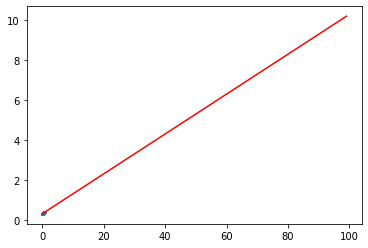

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize=2)
plt.plot(predicted,'r')
plt.show()

In [131]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [133]:
sess = tf.Session()
x_vals = np.array([1.,3., 5., 7., 9.])
y_vals = np.array([1.,3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data: x_val, y_data:y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [138]:
merged = tf.summary.merge_all()
if not os.path.exists("c://tmp/tensorboard_logs/"):
    os.makedirs('c://tmp/tensorboard_logs/')
    
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/', sess.graph)

- 아나콘다 prompt에서: tensorboard--logdir=/tmp
- 크롬에서 접속: http://localhost:6006/

In [141]:
import numpy
rng = numpy.random # 상수화할 때 좋은 점 : 수정할 일이 줄어서 편리함
learning_rate = 0.01
training_epochs = 4000
display_step = 50
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [143]:
# data point: 관측치
# 변수 개수
n_samples = train_X.shape[0] # 차수: 행(3,4)
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight") # 설명
b = tf.Variable(rng.randn(), name="bias") # activation 활성화
activation = tf.add(tf.multiply(X,W), b)
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) # ((예측치-실제값)^2) / 2*샘플 # minibatch 사이즈를 고려
# 역전파: optimizer도 하이퍼 파라미터
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 모멘텀 고려 # 하이퍼파라미터 
init = tf.initialize_all_variables()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 1.660607457 W= 0.18306708 b= -0.54654115
Epoch: 0001 cost= 1.585085750 W= 0.18954039 b= -0.54506993
Epoch: 0001 cost= 1.526783347 W= 0.19469291 b= -0.5441331
Epoch: 0001 cost= 1.422157526 W= 0.20427535 b= -0.54270506
Epoch: 0001 cost= 1.386636734 W= 0.20762245 b= -0.5422221
Epoch: 0001 cost= 1.354101777 W= 0.2106868 b= -0.54148686
Epoch: 0001 cost= 1.246963739 W= 0.22131243 b= -0.54040027
Epoch: 0001 cost= 1.184058070 W= 0.22774261 b= -0.5393601
Epoch: 0001 cost= 1.127477169 W= 0.23372886 b= -0.5385714
Epoch: 0001 cost= 1.111900091 W= 0.23532617 b= -0.5378343
Epoch: 0001 cost= 1.047604322 W= 0.24239993 b= -0.53682977
Epoch: 0001 cost= 0.971429467 W= 0.25119835 b= -0.53601444
Epoch: 0001 cost= 0.948749423 W= 0.25385922 b= -0.53551364
Epoch: 0001 cost= 0.894210756 W= 0.26048923 b= -0.5346846
Epoch: 0001 cost= 0.854655802 W= 0.26541778 b= -0.5338129
Epoch: 0001 cost= 0.812111855 W= 0.27094373 b= -0.5332168
Epoch: 0001 cost= 0.798003495 W= 0.27275503 b= -0.53263247
Epoch:

Epoch: 0451 cost= 0.112126373 W= 0.35564294 b= 0.045601025
Epoch: 0451 cost= 0.112008087 W= 0.3586183 b= 0.046277244
Epoch: 0451 cost= 0.112017229 W= 0.35884905 b= 0.046319198
Epoch: 0451 cost= 0.112350889 W= 0.3617533 b= 0.046752024
Epoch: 0451 cost= 0.111995354 W= 0.35824877 b= 0.046246316
Epoch: 0451 cost= 0.111996539 W= 0.35833108 b= 0.046266064
Epoch: 0451 cost= 0.111992255 W= 0.35727042 b= 0.046157602
Epoch: 0451 cost= 0.111995950 W= 0.35851118 b= 0.046358306
Epoch: 0451 cost= 0.111985385 W= 0.357451 b= 0.046218626
Epoch: 0451 cost= 0.111968853 W= 0.35796112 b= 0.046454027
Epoch: 0451 cost= 0.112005435 W= 0.35903722 b= 0.046606842
Epoch: 0451 cost= 0.112013772 W= 0.35614285 b= 0.04633862
Epoch: 0451 cost= 0.112103410 W= 0.35524112 b= 0.0461689
Epoch: 0451 cost= 0.112094477 W= 0.35532093 b= 0.04617888
Epoch: 0451 cost= 0.111988537 W= 0.35653433 b= 0.04639349
Epoch: 0451 cost= 0.112220675 W= 0.35429063 b= 0.04615145
Epoch: 0451 cost= 0.112171851 W= 0.3545743 b= 0.04624295
Epoch: 05

Epoch: 0901 cost= 0.088581085 W= 0.31072706 b= 0.36619592
Epoch: 0901 cost= 0.088501453 W= 0.31338415 b= 0.3667998
Epoch: 0901 cost= 0.088501386 W= 0.3133828 b= 0.36679956
Epoch: 0901 cost= 0.088791311 W= 0.31622627 b= 0.36722332
Epoch: 0901 cost= 0.088486500 W= 0.31270146 b= 0.3667147
Epoch: 0901 cost= 0.088487767 W= 0.31246352 b= 0.36665758
Epoch: 0901 cost= 0.088491336 W= 0.31214002 b= 0.3666245
Epoch: 0901 cost= 0.088495217 W= 0.31322995 b= 0.3668008
Epoch: 0901 cost= 0.088487305 W= 0.31227353 b= 0.3666748
Epoch: 0901 cost= 0.088481434 W= 0.31249997 b= 0.3667793
Epoch: 0901 cost= 0.088504478 W= 0.3135753 b= 0.366932
Epoch: 0901 cost= 0.088491283 W= 0.31176162 b= 0.36676392
Epoch: 0901 cost= 0.088569045 W= 0.3105954 b= 0.36654443
Epoch: 0901 cost= 0.088547848 W= 0.31084764 b= 0.36657596
Epoch: 0901 cost= 0.088490188 W= 0.31183174 b= 0.36675
Epoch: 0901 cost= 0.088613532 W= 0.31010082 b= 0.3665633
Epoch: 0901 cost= 0.088619985 W= 0.31004998 b= 0.3665469
Epoch: 0951 cost= 0.087234922 

Epoch: 1351 cost= 0.080795817 W= 0.2848609 b= 0.5508209
Epoch: 1351 cost= 0.080735601 W= 0.2873347 b= 0.55138314
Epoch: 1351 cost= 0.080731302 W= 0.28719974 b= 0.5513586
Epoch: 1351 cost= 0.080996782 W= 0.2900082 b= 0.5517771
Epoch: 1351 cost= 0.080721378 W= 0.28647172 b= 0.5512668
Epoch: 1351 cost= 0.080728389 W= 0.28604934 b= 0.55116546
Epoch: 1351 cost= 0.080726407 W= 0.28615034 b= 0.5511758
Epoch: 1351 cost= 0.080730341 W= 0.28715342 b= 0.551338
Epoch: 1351 cost= 0.080723740 W= 0.28625676 b= 0.5512199
Epoch: 1351 cost= 0.080722354 W= 0.28631982 b= 0.55124897
Epoch: 1351 cost= 0.080737628 W= 0.2873947 b= 0.5514016
Epoch: 1351 cost= 0.080722004 W= 0.28620338 b= 0.5512912
Epoch: 1351 cost= 0.080785021 W= 0.28488484 b= 0.55104303
Epoch: 1351 cost= 0.080761150 W= 0.2852364 b= 0.551087
Epoch: 1351 cost= 0.080725327 W= 0.28608844 b= 0.5512377
Epoch: 1351 cost= 0.080800988 W= 0.2846528 b= 0.55108285
Epoch: 1351 cost= 0.080825418 W= 0.28440934 b= 0.5510043
Epoch: 1401 cost= 0.080351263 W= 0

Epoch: 1801 cost= 0.078227356 W= 0.2699654 b= 0.65714043
Epoch: 1801 cost= 0.078177445 W= 0.27233368 b= 0.65767866
Epoch: 1801 cost= 0.078171007 W= 0.27212173 b= 0.6576401
Epoch: 1801 cost= 0.078422621 W= 0.27491003 b= 0.65805566
Epoch: 1801 cost= 0.078164294 W= 0.27136683 b= 0.6575444
Epoch: 1801 cost= 0.078176476 W= 0.27083823 b= 0.65741754
Epoch: 1801 cost= 0.078167938 W= 0.2711837 b= 0.6574529
Epoch: 1801 cost= 0.078171849 W= 0.27213678 b= 0.6576071
Epoch: 1801 cost= 0.078166030 W= 0.27127454 b= 0.6574935
Epoch: 1801 cost= 0.078166634 W= 0.2712435 b= 0.65747917
Epoch: 1801 cost= 0.078177430 W= 0.27231812 b= 0.65763175
Epoch: 1801 cost= 0.078163713 W= 0.2714852 b= 0.65755457
Epoch: 1801 cost= 0.078215636 W= 0.27007896 b= 0.65728986
Epoch: 1801 cost= 0.078191653 W= 0.2704877 b= 0.65734094
Epoch: 1801 cost= 0.078166425 W= 0.2712637 b= 0.6574782
Epoch: 1801 cost= 0.078219630 W= 0.2699981 b= 0.65734166
Epoch: 1801 cost= 0.078249857 W= 0.26964372 b= 0.65722734
Epoch: 1851 cost= 0.0780810

Epoch: 2251 cost= 0.077383243 W= 0.2613869 b= 0.7183712
Epoch: 2251 cost= 0.077338904 W= 0.26369438 b= 0.7188956
Epoch: 2251 cost= 0.077331372 W= 0.2634381 b= 0.718849
Epoch: 2251 cost= 0.077575088 W= 0.2662148 b= 0.71926284
Epoch: 2251 cost= 0.077326603 W= 0.26266772 b= 0.718751
Epoch: 2251 cost= 0.077342413 W= 0.26207796 b= 0.7186095
Epoch: 2251 cost= 0.077329002 W= 0.2625642 b= 0.7186592
Epoch: 2251 cost= 0.077332906 W= 0.2634885 b= 0.7188087
Epoch: 2251 cost= 0.077327460 W= 0.26264608 b= 0.7186977
Epoch: 2251 cost= 0.077329077 W= 0.26256087 b= 0.7186584
Epoch: 2251 cost= 0.077337272 W= 0.26363534 b= 0.718811
Epoch: 2251 cost= 0.077325732 W= 0.26300883 b= 0.7187529
Epoch: 2251 cost= 0.077370435 W= 0.26155207 b= 0.71847874
Epoch: 2251 cost= 0.077346869 W= 0.26199374 b= 0.718534
Epoch: 2251 cost= 0.077327073 W= 0.26272595 b= 0.7186635
Epoch: 2251 cost= 0.077368960 W= 0.2615583 b= 0.71853757
Epoch: 2251 cost= 0.077401005 W= 0.26114005 b= 0.7184026
Epoch: 2301 cost= 0.077335343 W= 0.260

Epoch: 2701 cost= 0.077058345 W= 0.25843662 b= 0.7541027
Epoch: 2701 cost= 0.077297546 W= 0.26120663 b= 0.7545155
Epoch: 2701 cost= 0.077054769 W= 0.25765735 b= 0.75400335
Epoch: 2701 cost= 0.077072844 W= 0.25703233 b= 0.7538534
Epoch: 2701 cost= 0.077056289 W= 0.25759968 b= 0.7539114
Epoch: 2701 cost= 0.077060163 W= 0.25850737 b= 0.7540582
Epoch: 2701 cost= 0.077054925 W= 0.25767636 b= 0.7539487
Epoch: 2701 cost= 0.077057064 W= 0.25755993 b= 0.753895
Epoch: 2701 cost= 0.077063799 W= 0.25863433 b= 0.7540476
Epoch: 2701 cost= 0.077053867 W= 0.2581267 b= 0.75400054
Epoch: 2701 cost= 0.077094108 W= 0.25664085 b= 0.7537209
Epoch: 2701 cost= 0.077070922 W= 0.25710148 b= 0.75377846
Epoch: 2701 cost= 0.077054054 W= 0.25780845 b= 0.7539035
Epoch: 2701 cost= 0.077090003 W= 0.2566972 b= 0.75378364
Epoch: 2701 cost= 0.077122599 W= 0.25624216 b= 0.75363684
Epoch: 2751 cost= 0.077092201 W= 0.25604704 b= 0.7564856
Epoch: 2751 cost= 0.077051230 W= 0.2583167 b= 0.7570014
Epoch: 2751 cost= 0.077043042 

Epoch: 3151 cost= 0.077018932 W= 0.2536002 b= 0.7739502
Epoch: 3151 cost= 0.076979473 W= 0.25585252 b= 0.7744621
Epoch: 3151 cost= 0.076970972 W= 0.255556 b= 0.77440816
Epoch: 3151 cost= 0.077207595 W= 0.25832212 b= 0.7748204
Epoch: 3151 cost= 0.076968081 W= 0.25477153 b= 0.774308
Epoch: 3151 cost= 0.076987535 W= 0.25412625 b= 0.77415323
Epoch: 3151 cost= 0.076969005 W= 0.2547403 b= 0.774216
Epoch: 3151 cost= 0.076972909 W= 0.25563842 b= 0.77436125
Epoch: 3151 cost= 0.076967791 W= 0.25481397 b= 0.77425265
Epoch: 3151 cost= 0.076970182 W= 0.25467956 b= 0.7741906
Epoch: 3151 cost= 0.076976061 W= 0.2557539 b= 0.7743432
Epoch: 3151 cost= 0.076967187 W= 0.25531474 b= 0.7743025
Epoch: 3151 cost= 0.077004768 W= 0.25381213 b= 0.77401966
Epoch: 3151 cost= 0.076981857 W= 0.2542837 b= 0.7740786
Epoch: 3151 cost= 0.076966614 W= 0.25497615 b= 0.7742011
Epoch: 3151 cost= 0.076999307 W= 0.2538974 b= 0.77408475
Epoch: 3151 cost= 0.077032022 W= 0.25342116 b= 0.77393115
Epoch: 3201 cost= 0.077013992 W= 

Epoch: 3551 cost= 0.076942109 W= 0.25383428 b= 0.78499186
Epoch: 3551 cost= 0.076978244 W= 0.25232285 b= 0.78470737
Epoch: 3551 cost= 0.076955520 W= 0.25280017 b= 0.78476703
Epoch: 3551 cost= 0.076941080 W= 0.25348496 b= 0.78488815
Epoch: 3551 cost= 0.076972090 W= 0.25242332 b= 0.78477365
Epoch: 3551 cost= 0.077004857 W= 0.2519359 b= 0.7846164
Epoch: 3601 cost= 0.076990962 W= 0.25196105 b= 0.7856497
Epoch: 3601 cost= 0.076952502 W= 0.25420174 b= 0.786159
Epoch: 3601 cost= 0.076943837 W= 0.25389674 b= 0.78610355
Epoch: 3601 cost= 0.077178948 W= 0.25666067 b= 0.7865155
Epoch: 3601 cost= 0.076941341 W= 0.25310937 b= 0.786003
Epoch: 3601 cost= 0.076961592 W= 0.25245237 b= 0.78584534
Epoch: 3601 cost= 0.076941915 W= 0.2530933 b= 0.7859109
Epoch: 3601 cost= 0.076945782 W= 0.25398594 b= 0.78605527
Epoch: 3601 cost= 0.076940775 W= 0.2531653 b= 0.78594714
Epoch: 3601 cost= 0.076943316 W= 0.25302055 b= 0.7858803
Epoch: 3601 cost= 0.076948695 W= 0.25409487 b= 0.7860329
Epoch: 3601 cost= 0.0769404

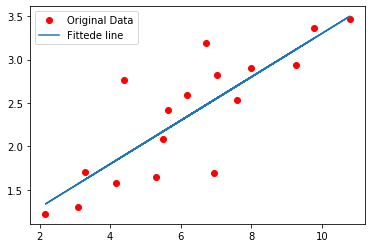

In [145]:
# 그래프 정의: node(연산) + edge(데이터 전달: tensor(배열적 요소 + 행렬적 요소))
# 전제 조건: GPU가 있다는 가정 => 네트워크로 연결
with tf.Session() as sess: # 실행부
    sess.run(init)
    for epoch in range(training_epochs): # epoch: 반복 횟수, # 데이터가 부족하기 때문에 동일한 데이터를 돌림
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            if epoch % display_step == 0: # 비용함수: 감소 - 우하향, # accuracy: 증가함수
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})),
                     "W=", sess.run(W), "b=", sess.run(b)) # 수렴값
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label = 'Original Data')
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label='Fitted Line') # predict한 결과값 출력: 회귀식 
    plt.legend()
    plt.show()

In [146]:
# tensor -> 직접 시각화하는 것이 불가능
import tensorflow as tf
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [150]:
my_distribution = tf.random_uniform((600,400), seed = 42) # 6x4 = 24개. 600x400(데이터 수)하면 균등분포(아래 그래프)가 달라짐
uniform = run_variable(my_distribution)

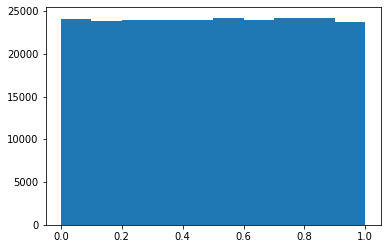

In [151]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 데이터 메모리 저장: 1차원
plt.show()

# activation 함수: 활성화 함수 - 회귀냐 분류냐를 결정
- 비선형 매핑(선형대수 -> 비선형으로 바꿈)
- 가중치를 깊게 하고 활성화 함수 매핑으로 XOR 문제를 해결

In [179]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start=-10., stop=10., num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[0.31326166 0.6931472  1.3132616 ]
[4.53988992e-05 5.55621925e-05 6.80006294e-05 8.32234827e-05
 1.01854002e-04 1.24654915e-04 1.52559623e-04 1.86710374e-04
 2.28504961e-04 2.79653838e-04 3.42249995e-04 4.18854392e-04
 5.12600439e-04 6.27321712e-04 7.67708042e-04 9.39496227e-04
 1.14970295e-03 1.40690911e-03 1.72160671e-03 2.10662180e-03
 2.57762963e-03 3.15378152e-03 3.85846667e-03 4.72023638e-03
 5.77392318e-03 7.06199264e-03 8.63617122e-03 1.05593993e-02
 1.29081631e-02 1.57752639e-02 1.92730804e-02 2.35373794e-02
 2.87317129e-02 3.50524161e-02 4.27341757e-02 5.20560700e-02
 6.33478781e-02 7.69963170e-02 9.34506760e-02 1.13227094e-01
 1.36910472e-01 1.65152775e-01 1.98666320e-01 2.38210660e-01
 2.84571982e-01 3.38534624e-01 4.00845440e-01 4.72173209e-01
 5.53066799e-01 6.43916968e-01 7.44927069e-01 8.56097102e-01
 9.77223714e-01 1.10791615e+00 1.24762553e+00 1.39

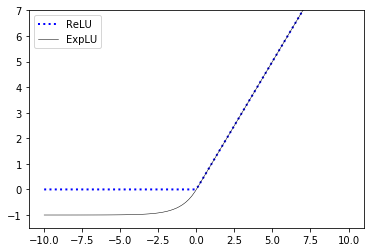

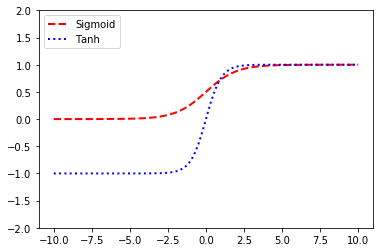

In [180]:
# ReLU
print(sess.run(tf.nn.relu([-3., 3., 10.]))) # 렐루가 가장 많이 쓰임. 0~무한대
y_relu = sess.run(tf.nn.relu(x_vals))

# Sigmoid
print(sess.run(tf.nn.sigmoid([-1., 0., 1.]))) 
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

# tanh
print(sess.run(tf.nn.tanh([-1., 0., 1.]))) # -1 ~ 1
y_tanh = sess.run(tf.nn.tanh(x_vals))

# elu
print(sess.run(tf.nn.elu([-1., 0., 1.]))) # -1 ~ 00 수정본 
y_elu = sess.run(tf.nn.elu(x_vals))

# softplus
print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # 각진 단점 보완(부드럽게)
y_softplus = sess.run(tf.nn.softplus(x_vals))

print(y_softplus)
print(y_elu)

############################################################################################# 다 그려보자
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5, 7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2, 2])
plt.legend(loc='upper left')
plt.show()


In [166]:
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
tf.set_random_seed(5) # 시드의 초기값
np.random.seed(42)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500) # 랜덤 데이터 500개
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) # 사이즈를 fix하지 않고(none) 입력 데이터로부터 계산. 한 개의 행 데이터로 생성

In [169]:
# y = ax + b 이지만 sigmoid로 매핑 => 0~1 사이 값으로 변함
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# 0 ~ oo(무한대)
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
# 0.75로 수렴 과정
# MSE
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print("\n Sigmoid & Relu 함수의 최적화 0.75")



 Sigmoid & Relu 함수의 최적화 0.75


In [170]:
loss_vec_sigmoid = [] # 로스값을 저장
loss_vec_relu = []

In [175]:
for i in range(500):
    # 500 -> 50
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    if i% 50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + '\t' +'relu = ' + str(np.mean(relu_output)))
        
# 0.75로 수렴하는 과정

sigmoid = 0.74903303	relu = 0.7492768
sigmoid = 0.74972016	relu = 0.74646974
sigmoid = 0.7499535	relu = 0.74655896
sigmoid = 0.74864596	relu = 0.75382453
sigmoid = 0.7491845	relu = 0.75044996
sigmoid = 0.74786156	relu = 0.757092
sigmoid = 0.7492991	relu = 0.7519531
sigmoid = 0.74979097	relu = 0.7482766
sigmoid = 0.7496743	relu = 0.74895364
sigmoid = 0.74910986	relu = 0.75318223


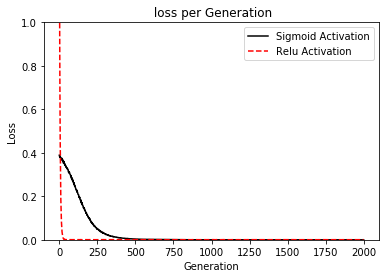

In [176]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation') # 빠른 속도로 근사해 감
plt.ylim([0, 1.0])
plt.title(' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 

In [ ]:


- 미니배치: 속도 개선, 지역해 문제 해결

- 액티베이션 함수 역할: 선형을 비선형으로 매핑하여 회귀와 분류 구분
- 경사하강법: 러닝레이트, 기울기 - 두가지 문제